In [57]:
import pandas as pd
import numpy as np
import json
# import youtube_transcript_api
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import networkx as nx
# import matplotlib.pyplot as plt

In [58]:
# load json file for video info
with open('video_info.json') as f:
    data = json.load(f)

data

{'kind': 'youtube#videoListResponse',
 'etag': 'jnAYseHNhnLQsHYOASf-35YClJs',
 'items': [{'kind': 'youtube#video',
   'etag': 'O95fpagxQ3kFaelC78FhbStrTjo',
   'id': 'ZCR-WCfKgXg',
   'snippet': {'publishedAt': '2022-09-11T17:40:40Z',
    'channelId': 'UCthuB94SdcUmtHlKUP9M-eg',
    'title': '0.0001% Chance of this happening in stumble guys (block dash)',
    'description': 'Has this happened to you?',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/ZCR-WCfKgXg/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/ZCR-WCfKgXg/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/ZCR-WCfKgXg/hqdefault.jpg',
      'width': 480,
      'height': 360},
     'standard': {'url': 'https://i.ytimg.com/vi/ZCR-WCfKgXg/sddefault.jpg',
      'width': 640,
      'height': 480},
     'maxres': {'url': 'https://i.ytimg.com/vi/ZCR-WCfKgXg/maxresdefault.jpg',
      'width': 1280,
      'height'

In [23]:
# load json
with open('hasan_transcript.json') as f:
    data = json.load(f)

# print(data[0].keys())
print(len(data))
print(data)


NameError: name 'json' is not defined

In [ ]:
pip install langchain

In [6]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.9)

In [60]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 7.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# load a txt file
with open('../../transcript.txt') as f:
    text = f.read()

In [178]:
# THIS ALSO WORKS. ADD PYVIS AND SHIP

import stanza
import pandas as pd
import networkx as nx

# Download and load an English Stanza pipeline
stanza.download("en")
nlp = stanza.Pipeline("en", processors="tokenize,ner")

# Input text
text = text

# Perform NER
doc = nlp(text)

# Extract named entities
named_entities = [ent.text for ent in doc.ents]

# Build co-occurrence graph
G = nx.Graph()
G.add_nodes_from(named_entities)
window_size = 7

for sent in doc.sentences:
    for idx, word in enumerate(sent.words):
        if word.text in named_entities:
            for neighbor_idx in range(idx + 1, min(idx + 1 + window_size, len(sent.words))):
                neighbor = sent.words[neighbor_idx]
                if neighbor.text in named_entities:
                    G.add_edge(word.text, neighbor.text)

# Apply TextRank
pagerank = nx.pagerank(G)

# Filter important named entities
# get the mean page rank and set that as a threshold
threshold = np.mean(list(pagerank.values()))
important_entities = [entity for entity, score in pagerank.items() if score > threshold]

# Build the relationships DataFrame (in this case, we use the edges from the co-occurrence graph)
relationships = [(src, "co-occurs", tgt) for src, tgt in G.edges()]
df = pd.DataFrame(relationships, columns=["Source", "Relationship", "Target"])

display(df)

2023-04-19 21:27:24 INFO: Downloading default packages for language: en (English) ...
2023-04-19 21:27:25 INFO: File exists: /Users/coultont/stanza_resources/en/default.zip
2023-04-19 21:27:29 INFO: Finished downloading models and saved to /Users/coultont/stanza_resources.
2023-04-19 21:27:29 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-04-19 21:27:30 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2023-04-19 21:27:30 INFO: Using device: cpu
2023-04-19 21:27:30 INFO: Loading: tokenize
2023-04-19 21:27:30 INFO: Loading: ner
2023-04-19 21:27:30 INFO: Done loading processors!


,Source,Relationship,Target
0,two,co-occurs,one
1,two,co-occurs,Android
2,GraphQL,co-occurs,TRPC
3,GraphQL,co-occurs,JavaScript
4,GraphQL,co-occurs,Meta
5,GraphQL,co-occurs,Redwood
6,GraphQL,co-occurs,Kotlin
7,TypeScript,co-occurs,TypeScript
8,TypeScript,co-occurs,TRPC
9,one,co-occurs,API


In [179]:
# THIS PART ALSO WORKS. SHIP

from pyvis.network import Network

# Create a subgraph with the important named entities
subgraph = G.subgraph(important_entities)

# Initialize a pyvis network
net = Network(notebook=True)

# Add nodes and edges from the subgraph to the pyvis network
for node in subgraph.nodes():
    net.add_node(node, label=node, color="lightblue")

for src, tgt in subgraph.edges():
    net.add_edge(src, tgt, label="co-occurs")

# Visualize the network
net.show("graph.html")
# save the network
net.save_graph("graph.html")

graph.html


In [132]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [123]:
display(pagerank.items())

dict_items([('Theo', 0.01067626930305452), ('Switch', 0.01067626930305452), ('about half a decade', 0.01067626930305452), ('Amazon', 0.01067626930305452), ('Ping.g', 0.01067626930305452), ('1-22', 0.01067626930305452), ('YouTuber', 0.01067626930305452), ('a few thousand', 0.01067626930305452), ('Wednesday', 0.01067626930305452), ('today', 0.01067626930305452), ('Google', 0.01067626930305452), ('First', 0.01067626930305452), ('three', 0.01067626930305452), ('two', 0.07117362039377677), ('GraphQL', 0.07117362039377677), ('Twitter', 0.01067626930305452), ('TypeScript', 0.01067626930305452), ('one', 0.07117362039377677), ('TRPC', 0.07117362039377677), ('Apollo', 0.01067626930305452), ('JavaScript', 0.01067626930305452), ('GraphQL GoFers', 0.01067626930305452), ('API', 0.01067626930305452), ('GraphQL APIs', 0.01067626930305452), ('Meta', 0.01067626930305452), ('Facebook', 0.01067626930305452), ('Swift', 0.05481738815661664), ('Kotlin Android', 0.01067626930305452), ('Xbox', 0.01067626930305

In [140]:
import itertools

# Create a co-occurrence graph
co_occurrence_graph = nx.Graph()
co_occurrence_graph.add_nodes_from(named_entities)

window_size = 2
doc_tokens = [token.text for sentence in doc.sentences for token in sentence.tokens]

for i in range(len(doc_tokens) - window_size):
    window = doc_tokens[i : i + window_size]
    entities_in_window = [entity for entity in named_entities if entity in window]
    co_occurrence_graph.add_edges_from(itertools.combinations(entities_in_window, 2))

# Calculate degree centrality for each entity
degree_centrality = nx.degree_centrality(co_occurrence_graph)

# Set a threshold to filter out less important entities
threshold = 0.1

# Filter out entities based on the threshold
important_entities = [entity for entity, centrality in degree_centrality.items() if centrality >= threshold]

# Create a subgraph with the important named entities
subgraph = G.subgraph(important_entities)

# Update the pyvis network
net = Network(notebook=True)

for node in subgraph.nodes():
    net.add_node(node, label=node, color="lightblue")

for src, tgt in subgraph.edges():
    net.add_edge(src, tgt, label="in same cluster")

# Visualize the updated network
net.show("graph_filtered.html")
net.save_graph("graph_filtered.html")

graph_filtered.html


In [181]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 5.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-12.6-arm64-cpython-311
      creating build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/wordcloud_cli.py -> build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/_version.py -> build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/__init__.py -> build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/tokenization.py -> build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/wordcloud.py -> build/lib.macosx-12.6-arm64-cpython-311/wordcloud
      copying wordcloud/color_from_image.py -> build/lib.macosx-1

In [2]:
import wordcloud
# make a wordcloud of text
wordcloud = wordcloud.WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [147]:
# THIS WORKS -- SHIP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    s_scores = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        s_scores.append(silhouette_score(data, kmeans.labels_))

    optimal_k = iters[s_scores.index(max(s_scores))]

    return optimal_k

In [180]:
# THIS ONE WORKS -- Convert into Functions and ship

import stanza
import spacy
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
from pyvis.network import Network

# Download and load an English Stanza pipeline and Spacy pre-trained model
stanza.download("en")
nlp_stanza = stanza.Pipeline("en", processors="tokenize,ner")
nlp_spacy = spacy.load("en_core_web_sm")


# Perform NER
doc = nlp_stanza(text)

# Extract named entities
named_entities = [ent.text for ent in doc.ents if ent.type in {"PERSON", "ORG", "PRODUCT", "GPE", "EVENT", "FAC", "LANGUAGE", "LAW"}]

# Create entity embeddings using Spacy
embeddings = [nlp_spacy(entity).vector for entity in named_entities]

# Apply k-means clustering
n_clusters = find_optimal_clusters(embeddings, 10)
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(embeddings)

# Create a graph where entities in the same cluster are connected
G = nx.Graph()
G.add_nodes_from(named_entities)

for i in range(n_clusters):
    cluster_entities = [named_entities[j] for j in range(len(named_entities)) if labels[j] == i]
    G.add_edges_from([(src, tgt) for src in cluster_entities for tgt in cluster_entities if src != tgt])

# Initialize a pyvis network
net = Network(notebook=True)

# Add nodes and edges from the graph to the pyvis network
for node in G.nodes():
    net.add_node(node, label=node, color="lightblue")

print(G.nodes())

for src, tgt in G.edges():
    net.add_edge(src, tgt)

print(G.edges())

# Visualize the network
net.show("graph.html")
net.save_graph("graph1.html")

2023-04-19 21:35:15 INFO: Downloading default packages for language: en (English) ...
2023-04-19 21:35:17 INFO: File exists: /Users/coultont/stanza_resources/en/default.zip
2023-04-19 21:35:20 INFO: Finished downloading models and saved to /Users/coultont/stanza_resources.
2023-04-19 21:35:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-04-19 21:35:21 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2023-04-19 21:35:21 INFO: Using device: cpu
2023-04-19 21:35:21 INFO: Loading: tokenize
2023-04-19 21:35:21 INFO: Loading: ner
2023-04-19 21:35:21 INFO: Done loading processors!


['Theo', 'Switch', 'Amazon', 'Ping.g', 'YouTuber', 'Google', 'GraphQL', 'Twitter', 'TypeScript', 'TRPC', 'Apollo', 'JavaScript', 'GraphQL GoFers', 'API', 'GraphQL APIs', 'Meta', 'Facebook', 'Swift', 'Kotlin Android', 'Xbox', 'Python', 'Prisma', 'T3', 'GraphQL at Twitch', 'Redwood JS', 'Redwood', 'Create T3', 'Kotlin', 'Android', 'Tailwind']
[('Theo', 'Switch'), ('Theo', 'Xbox'), ('Theo', 'Tailwind'), ('Switch', 'Xbox'), ('Switch', 'Tailwind'), ('Amazon', 'YouTuber'), ('Amazon', 'TypeScript'), ('Amazon', 'JavaScript'), ('Ping.g', 'Twitter'), ('Ping.g', 'API'), ('Ping.g', 'Facebook'), ('Ping.g', 'Python'), ('Ping.g', 'Prisma'), ('Ping.g', 'Android'), ('YouTuber', 'TypeScript'), ('YouTuber', 'JavaScript'), ('Google', 'Apollo'), ('Twitter', 'API'), ('Twitter', 'Facebook'), ('Twitter', 'Python'), ('Twitter', 'Prisma'), ('Twitter', 'Android'), ('TypeScript', 'JavaScript'), ('GraphQL GoFers', 'GraphQL APIs'), ('GraphQL GoFers', 'Kotlin Android'), ('GraphQL GoFers', 'GraphQL at Twitch'), ('Gra

/Users/coultont/.local/share/virtualenvs/mydata_1653881363012-lJlfWPIN/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


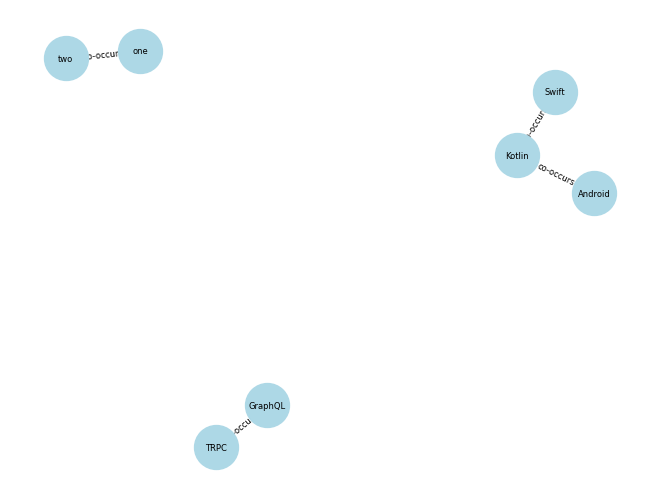

In [130]:
import matplotlib.pyplot as plt

# Create a subgraph with the important named entities
subgraph = G.subgraph(important_entities)

# Visualize the network
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=6)
edge_labels = {(src, tgt): "co-occurs" for src, tgt in subgraph.edges()}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=6)
plt.show()

2023-04-19 19:53:35 INFO: Downloading default packages for language: en (English) ...
2023-04-19 19:53:37 INFO: File exists: /Users/coultont/stanza_resources/en/default.zip
2023-04-19 19:53:41 INFO: Finished downloading models and saved to /Users/coultont/stanza_resources.
2023-04-19 19:53:41 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-04-19 19:53:42 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| ner       | ontonotes |

2023-04-19 19:53:42 INFO: Using device: cpu
2023-04-19 19:53:42 INFO: Loading: tokenize
2023-04-19 19:53:42 INFO: Loading: pos
2023-04-19 19:53:42 INFO: Loading: lemma
2023-04-19 19:53:42 INFO: Loading: depparse
2023-04-19 19:53:42 INFO: Loading: ner
202

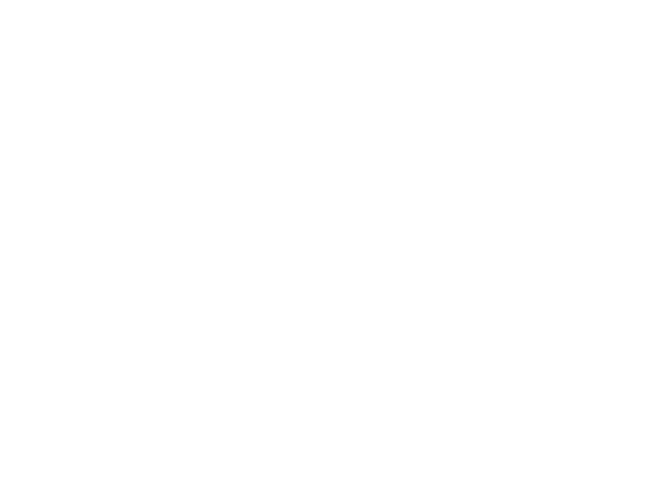

In [94]:
import stanza
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Download and load an English Stanza pipeline
stanza.download("en")
nlp = stanza.Pipeline("en", processors="tokenize,pos,lemma,ner,depparse")

# Input text
text = "John Doe works at Google. Jane Smith lives in London and works at Microsoft."

# Perform NER and dependency parsing
doc = nlp(text)

# Filter named entities based on type and frequency
allowed_entity_types = {"PERSON", "ORG", "PRODUCT", "GPE", "EVENT", "WORK_OF_ART", "LAW", "FAC", "LANGUAGE"}
min_entity_freq = 1
entity_counter = {}
filtered_entities = []

for ent in doc.ents:
    if ent.type in allowed_entity_types:
        entity_counter[ent.text] = entity_counter.get(ent.text, 0) + 1

for ent, freq in entity_counter.items():
    if freq >= min_entity_freq:
        filtered_entities.append(ent)

# Extract relationships
relationships = []
for sent in doc.sentences:
    for word in sent.words:
        if word.deprel == 'nsubj' and word.head > 0:
            subj = word.text
            obj = sent.words[word.head - 1].text
            if subj in filtered_entities and obj in filtered_entities:
                relationships.append((subj, 'nsubj', obj))

# Create a pandas DataFrame
df = pd.DataFrame(relationships, columns=["Source", "Relationship", "Target"])

# Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Relationship")

# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12)
edge_labels = nx.get_edge_attributes(G, "Relationship")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.show()

{'Howdy': 1, 'Theo': 1, 'Switch': 1, 'Amazon': 2, 'YouTuber': 1, 'T3': 10, 'API': 4, 'Angular': 1, 'Google': 1, 'us': 1, 'Value': 1, 'Twitter': 1, 'TypeScript': 9, 'TRPC': 22, 'GraphQL': 12, 'Apollo': 3, 'JavaScript': 1, 'GoFers': 1, 'Meta': 1, 'Kotlin Android': 1, 'GoLang': 1, 'Prisma': 2, 'Twitch': 1, 'Create T3': 2, 'Redwood JS': 3, 'Redwood': 12, 'Swift': 1, 'Kotlin': 1, 'the GraphQL standard': 1, 'Android': 1, 'Client': 1, 'Composibility Summit': 1, 'Tailwind': 1}
['Howdy', 'Theo', 'Switch', 'Amazon', 'YouTuber', 'T3', 'API', 'Angular', 'Google', 'us', 'Value', 'Twitter', 'TypeScript', 'TRPC', 'GraphQL', 'Apollo', 'JavaScript', 'GoFers', 'Meta', 'Kotlin Android', 'GoLang', 'Prisma', 'Twitch', 'Create T3', 'Redwood JS', 'Redwood', 'Swift', 'Kotlin', 'the GraphQL standard', 'Android', 'Client', 'Composibility Summit', 'Tailwind']


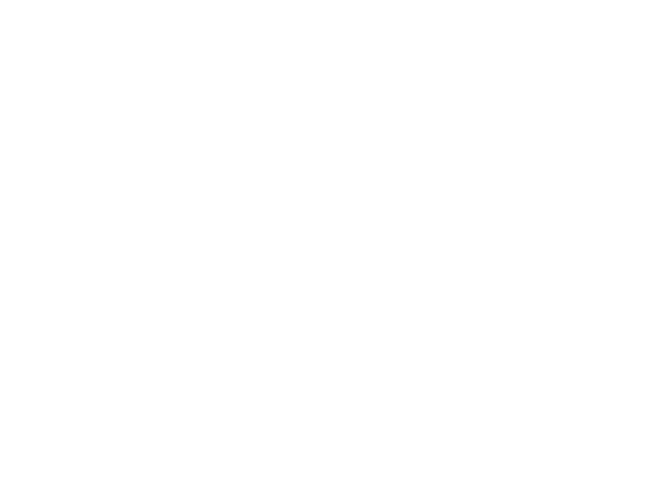

In [81]:
import spacy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load a spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Input text
text = text

# Perform NER
doc = nlp(text)

# Filter named entities based on type and frequency
allowed_entity_types = {"PERSON", "ORG", "PRODUCT", "GPE", "EVENT", "WORK_OF_ART", "LAW", "FAC", "LANGUAGE"}
min_entity_freq = 1
entity_counter = {}
filtered_entities = []

for ent in doc.ents:
    if ent.label_ in allowed_entity_types:
        entity_counter[ent.text] = entity_counter.get(ent.text, 0) + 1
print(entity_counter)

for ent, freq in entity_counter.items():
    if freq >= min_entity_freq:
        filtered_entities.append(ent)

print(filtered_entities)

# Extract relationships
relationships = []
for token in doc:
    if token.dep_ in {"attr", "dobj"}:
        subject = [t for t in token.head.lefts if t.dep_ == "nsubj"]
        if subject and subject[0].text in filtered_entities and token.text in filtered_entities:
            relationships.append((subject[0], token.dep_, token))
    elif token.dep_ == "pobj" and token.head.dep_ == "prep":
        subject = [t for t in token.head.head.lefts if t.dep_ == "nsubj"]
        if subject and subject[0].text in filtered_entities and token.text in filtered_entities:
            relationships.append((subject[0], f"{token.head.dep_}_{token.dep_}", token))

# Create a pandas DataFrame
df = pd.DataFrame(relationships, columns=["Source", "Relationship", "Target"])

# Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Relationship")

# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12)
edge_labels = nx.get_edge_attributes(G, "Relationship")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.show()

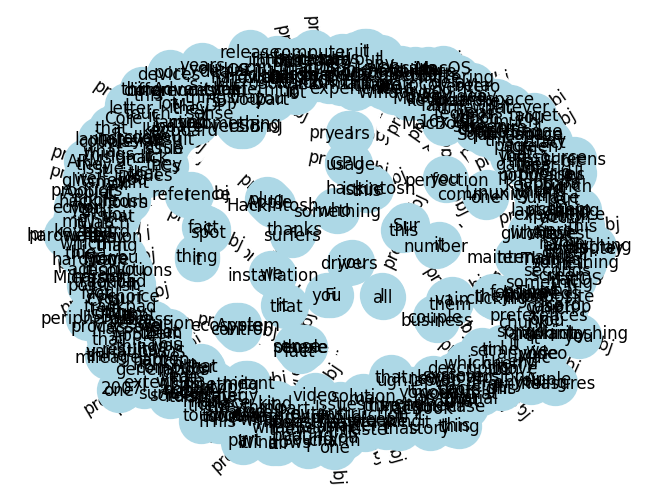

In [70]:
import spacy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load a spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Input text
text = text

# Perform NER
doc = nlp(text)

# Extract relationships using custom rules
relationships = []
for token in doc:
    if token.dep_ in {"attr", "dobj"}:
        subject = [t for t in token.head.lefts if t.dep_ == "nsubj"]
        if subject:
            relationships.append((subject[0], token.dep_, token))
    elif token.dep_ == "pobj" and token.head.dep_ == "prep":
        subject = [t for t in token.head.head.lefts if t.dep_ == "nsubj"]
        if subject:
            relationships.append((subject[0], f"{token.head.dep_}_{token.dep_}", token))

# Create a pandas DataFrame
df = pd.DataFrame(relationships, columns=["Source", "Relationship", "Target"])

# Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Relationship")



# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=12)
edge_labels = nx.get_edge_attributes(G, "Relationship")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.show()

In [19]:
from langchain import ConversationChain
conversation = ConversationChain(llm=llm, verbose=True)

In [10]:
conversation.predict(input="Are you a chatbot")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI:  Hello! How can I help you today?
Human: Are you a chatbot
AI:

> Finished chain.


" Yes I am! I'm an AI machine designed to simulate conversation with humans. I'm programmed to answer questions and provide information about the context I'm in."

In [11]:
conversation.predict(input="I'm doing well! Just having a conversation with an AI.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI:  Hello! How can I help you today?
Human: Are you a chatbot
AI:  Yes I am! I'm an AI machine designed to simulate conversation with humans. I'm programmed to answer questions and provide information about the context I'm in.
Human: I'm doing well! Just having a conversation with an AI.
AI:

> Finished chain.


" Oh wow, that's really cool! It's a pleasure to meet you. Do you have any questions you would like to ask me?"

In [12]:
from langchain.prompts import PromptTemplate

In [13]:
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

In [14]:
print(prompt.format(product="colorful socks"))

What is a good name for a company that makes colorful socks?


In [15]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt)

In [17]:
chain.run("black socks")

'\n\nOnyx Socks'

In [ ]:
pip install srt

In [128]:
import srt

In [3]:
with open('hasan_transcript.json') as f:
    data = json.load(f)
print(data)
text = data[]

[{'transcript': [{'text': 'uh we are now moving on to Missouri a', 'start': 0.0, 'duration': 5.04}, {'text': 'teenager was shot after going to the', 'start': 3.24, 'duration': 3.96}, {'text': 'wrong house to pick up his brother and', 'start': 5.04, 'duration': 4.32}, {'text': 'the person who shot him was uh was', 'start': 7.2, 'duration': 3.3}, {'text': 'questioned by the police and then', 'start': 9.36, 'duration': 3.12}, {'text': "released let's take a look went to the", 'start': 10.5, 'duration': 3.66}, {'text': 'wrong home to pick up his younger', 'start': 12.48, 'duration': 4.46}, {'text': 'brothers and the homeowner shot him', 'start': 14.16, 'duration': 4.8}, {'text': 'sixteen-year-old Ralph yarl is', 'start': 16.94, 'duration': 3.58}, {'text': 'recovering in the hospital in stable', 'start': 18.96, 'duration': 4.2}, {'text': 'condition his family describes him as a', 'start': 20.52, 'duration': 5.22}, {'text': 'typical high schooler who loves to play', 'start': 23.16, 'duration

In [20]:


prompt = PromptTemplate(
    input_variables=["product"],
    template=template,
)

"We are now moving on to Missouri.  A teenager was shot afte\nr going to the wrong house  to pick up his brother.  And the\n person who shot him was questioned by the police  and then \nreleased.  Let's take a look.  Went to the wrong home to pic\nk up his younger brothers  and the homeowner shot him.  16-y\near-old Ralph Yarrall is recovering  in the hospital in stab\nle condition.  His family describes him as a typical high sc\nhooler  who loves to play the bass clarinet.  He has been lo\noking forward to starting college  and majoring in chemical \nengineering.  Police say Yarrall's family say that he was gi\nven the address 115th terrorists,  but he mistakenly went to\n a home at 115th Street instead.  The shooter has been relea\nsed and there is sparking protest  nationwide right now and \noutrage nationwide.  Good morning, Don.  authority say more \nis needed to go forward  and they need a statement from Ralp\nh Yarrall.  He is doing well.  He's in the hospital.  He's r\necoverin

In [23]:
def split_text(text, chunks_size=700):
    texts = []
    while len(text.split()) > chunks_size:
        texts.append(" ".join(text.split()[:chunks_size]))
        text = " ".join(text.split()[chunks_size:])
    texts.append(text) if text else None
    return texts


In [29]:
import spacy

In [42]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [167]:
def get_cosine_similarity(phrase, chunks):
    # Load the medium-sized English model with word embeddings
    nlp = spacy.load("en_core_web_md")

    # Create a spaCy document for the phrase
    phrase_doc = nlp(phrase)

    # Calculate the cosine similarity between the phrase and each chunk
    similarities = []
    for chunk in chunks:
        chunk_doc = nlp(chunk)
        similarity = phrase_doc.similarity(chunk_doc)
        similarities.append(similarity)

    return similarities

In [172]:
def split_text(text, chunks_size=2000):
    texts = []
    while len(text.split()) > chunks_size:
        texts.append(" ".join(text.split()[:chunks_size]))
        text = " ".join(text.split()[chunks_size:])
    texts.append(text) if text else None
    return texts

In [173]:
phrase = "How was GraphQL used at Twitch?"
# print(phrase1:=llm(f"get the named entities from the following phrase. Don't respond with anything more: {phrase}"))
chunks = split_text(text)
similarities = get_cosine_similarity(phrase, chunks)

print(similarities)

[0.5052581811772578, 0.5061514756785479, 0.4993290119493416]


In [174]:
# # get the index of the chunk with the highest similarity
# index = similarities.index(max(similarities))

# get the top 3 chunks with the highest similarity
top = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[0]

# print the chunks with the highest similarity
# for index in top_3:
#     print(chunks[index])

print(llm(f"Context: {chunks[index]}. Answer the following question with this context. If the question cannot be answered with the context given, please say this. Question: {phrase}?"))



At Twitch, GraphQL was used as a way to communicate better and define standards between the backend and front end teams so that they could build and scale their applications more effectively. It allowed teams to be able to access data easily and reliably, and it was beneficial in helping reduce the number of comms challenges and costs between the two teams.


In [3]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 27.8 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [150]:
import re
import nltk
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def split_text(text, chunks_size=750):
    texts = []
    while len(text.split()) > chunks_size:
        texts.append(" ".join(text.split()[:chunks_size]))
        text = " ".join(text.split()[chunks_size:])
    texts.append(text) if text else None
    return texts

# Pre-process the text
def preprocess(text):
    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    words = re.findall(r'\w+', text.lower())
    clean_text = " ".join([stemmer.stem(word) for word in words if word not in stop_words])
    return clean_text

# Build a similarity graph
def build_similarity_graph(text_chunks):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_chunks)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

# Apply PageRank and find the most relevant result
def most_relevant_result(text):
    # Split the text into chunks
    text_chunks = split_text(text)

    # Pre-process the text chunks
    clean_chunks = [preprocess(chunk) for chunk in text_chunks]

    # Build the similarity graph
    similarity_graph = build_similarity_graph(clean_chunks)

    # Compute PageRank scores
    nx_graph = nx.from_numpy_array(similarity_graph)
    pagerank_scores = nx.pagerank(nx_graph)

    # Find the most relevant chunk
    most_relevant_index = max(pagerank_scores, key=pagerank_scores.get)
    print(most_relevant_index)
    print(pagerank_scores)
    most_relevant_chunk = text_chunks[most_relevant_index]

    return most_relevant_chunk


num_chunks = 10
most_relevant_chunk = most_relevant_result(text)
print("Most relevant chunk:\n", most_relevant_chunk)

5
{0: 0.13573206263565532, 1: 0.14535811198269927, 2: 0.14810201582580754, 3: 0.14665590314586963, 4: 0.14363692644759837, 5: 0.1528824767612401, 6: 0.12763250320113004}
Most relevant chunk:
 the cost of moving off of Redwood is significantly higher. In fact, once you've paid the cost of moving off of create T3 app, that's the point where you get to where Redwood is right then. I again, this is all very arbitrary and it's going to depend a lot on the business that you're building or the projects that you're like working on. But this is lined up with the experience I've had consulting with companies and talking to developers who have used all these different technologies. That all said, this is one of the biggest benefits of building modularly with create T3 app in TRPC being relatively modular solutions, the cost to move off them is pretty cheap and you can move to anything else at that point. So what are some things that we should be considering when we do these measurements? The one 

In [69]:
# load a txt file
with open('../../transcript.txt') as f:
    text = f.read()

In [55]:
def search_text(text, query, top_n=3):
    # Split the text into chunks
    text_chunks = split_text(text)

    # Pre-process the text chunks and query
    clean_chunks = [preprocess(chunk) for chunk in text_chunks]
    clean_query = preprocess(query)

    # Build the similarity graph
    similarity_graph = build_similarity_graph(clean_chunks + [clean_query])
    print(similarity_graph)

    # Compute PageRank scores
    nx_graph = nx.from_numpy_array(similarity_graph)
    pagerank_scores = nx.pagerank(nx_graph)

    # Find the top N most relevant chunks
    sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
    top_n_chunks_indices = [idx for idx, _ in sorted_scores[:top_n]]

    top_n_chunks = [text_chunks[idx] for idx in top_n_chunks_indices if idx < len(text_chunks)]

    return top_n_chunks

text=data
query = "What is a house"
top_n_results = 3
relevant_chunks = search_text(text, query, top_n_results)

print("Top", top_n_results, "relevant chunks:")
for i, chunk in enumerate(relevant_chunks):
    print(f"{i + 1}. {chunk}\n")

[[1.         0.26178989 0.36711374 0.22507063 0.17939022 0.35925361
  0.07183658 0.07985704]
 [0.26178989 1.         0.28935927 0.23767057 0.25289116 0.29380908
  0.06701776 0.        ]
 [0.36711374 0.28935927 1.         0.26531684 0.20889652 0.34178282
  0.0757329  0.        ]
 [0.22507063 0.23767057 0.26531684 1.         0.329237   0.30211107
  0.13577415 0.        ]
 [0.17939022 0.25289116 0.20889652 0.329237   1.         0.25838275
  0.05905737 0.        ]
 [0.35925361 0.29380908 0.34178282 0.30211107 0.25838275 1.
  0.09054173 0.        ]
 [0.07183658 0.06701776 0.0757329  0.13577415 0.05905737 0.09054173
  1.         0.        ]
 [0.07985704 0.         0.         0.         0.         0.
  0.         1.        ]]
Top 3 relevant chunks:
1. for a few seconds before showing the login screen, but I haven't really thought much of it. That might actually be the 7-15 second Garble display that the guide was talking about. Indeed it is gone now, so that must be it. And now after using it

In [17]:
llm('hello')

NameError: name 'llm' is not defined

In [50]:
chunks[1]

"towards those who you are terrified of, those who you believe have done something wrong. Absol utely what's going on. That's why I said it's the exact sam e mentality behind Governor Greg Abbott fantasizing about i mmediately pardoning Daniel, uh, fuck, I don't want to fuck up his name. Yeah, it is Daniel Perry. He's a fastard the person who he shot, but it's the same principle. He's Danie l Perry went to a Black Lives Matter rally, said he was goin g to shoot people. He fantasized about shooting protesters and then he drove his, drove his car into a Black Lives Mat ter rally and then shot one of the Black Lives Matter protes ters and he was convicted. He was found guilty by a jury of his peers beyond a reasonable doubt and yet Governor Greg A bbott wants to pardon him. Why? Because that's what they want. They want the law to protect them and them only. If you go out and you shoot Black Lives Matter protesters, like you will be safe. Don't worry. That's the message they wa nt to put o

In [28]:
chunks = split_text(text)
print(len(chunks))

5


In [5]:
text = """We are now moving on to Missouri.  A teenager was shot after going to the wrong house  to pick up his brother.  And the
 person who shot him was questioned by the police  and then 
released.  Let's take a look.  Went to the wrong home to pic
k up his younger brothers  and the homeowner shot him.  16-y
ear-old Ralph Yarrall is recovering  in the hospital in stab
le condition.  His family describes him as a typical high sc
hooler  who loves to play the bass clarinet.  He has been lo
oking forward to starting college  and majoring in chemical 
engineering.  Police say Yarrall's family say that he was gi
ven the address 115th terrorists,  but he mistakenly went to
 a home at 115th Street instead.  The shooter has been relea
sed and there is sparking protest  nationwide right now and 
outrage nationwide.  Good morning, Don.  authority say more 
is needed to go forward  and they need a statement from Ralp
h Yarrall.  He is doing well.  He's in the hospital.  He's r
ecovering, but the family says that this is a long road,  es
pecially when it comes to his mental and his emotional healt
h.  This is a teenager that is being described as friendly a
nd well mannered.  I can't begin the fathom.  How glaringly 
obvious the sentiment expressed by our institutions are.  Wh
en you see a situation like this where like a young black te
enager is shot  for the crime of like ringing on the wrong d
oorbell  and the mistreatment by the state of the perpetrato
r is like deliberate.  You know what I mean?  I mean, I'm so
rry.  It is. It has to be.  It's basically the same as like 
the Daniel Perry circumstance where it's like  it doesn't ma
tter like you are a criminal for there's a reasonable doubt 
 here of your criminality because you're a black kid.  Okay,
 because you're black.  Like they want to basically reinforc
e the incredibly scary precedent  that like you shoot a blac
k kid at standard ground, baby.  You know what I mean?  That
's just that's how it is.  So you probably heard this story.
  It's really awful.  The 16 year old kid who knocked on a d
oor in a house in Kansas City, Missouri  to look for sibling
s whom he was picking up.  Wrong house, the homeowner instea
d of letting him go on his way and said  shoots the kid in t
he head and then shoots him again.  The kid survived and his
 recovery, but his in bad shape.  Obviously the kid was blac
k.  Kid is black.  The shooter is white and there's no lot o
f conversation around this about racism  rightfully so about
 the white availability of guns rightfully so about the lack
 of  a benefit of the doubt that black children get rightful
ly so.  But I want to bring up really quickly just because o
f my interest in sort of the history  of gun regulation of g
un culture and this sort of thing is how this is sort of  ex
actly the scenario from the perspective of the homeowner, th
e white homeowner,  the scenario of a young black person com
ing to your home probably a criminal  whom you can then shoo
t is exactly what so many mouthpieces for the gun industry  
has been selling for decades.  It's part of the pitch that y
ou own one of these weapons.  You own a lot of these weapons
 to defend your home set, to defend your home and from  whom
 this image of urban crime, of urban disorder of essentially
 black people.  It's part, again, it's part of the pitch.  E
xactly.  It's the same attitude.  It's spot on.  It's reinfo
rcing the narrative that you need a gun to defend yourself f
rom urban crime.  It's the same principle behind the McClosk
eys becoming like famous within the Republican  world for ru
nning outside with their AR-15s when their Black Lives Matte
r protest  happening in their gated community.  It is a way 
to sell guns through a white supremacist fantasy of vigilant
e justice being enacted  towards those who you are terrified
 of, those who you believe have done something wrong.  Absol
utely what's going on.  That's why I said it's the exact sam
e mentality behind Governor Greg Abbott fantasizing about  i
mmediately pardoning Daniel, uh, fuck, I don't want to fuck 
up his name.  Yeah, it is Daniel Perry.  He's a fastard the 
person who he shot, but it's the same principle.  He's Danie
l Perry went to a Black Lives Matter rally, said he was goin
g to shoot people.  He fantasized about shooting protesters 
and then he drove his, drove his car into a Black Lives  Mat
ter rally and then shot one of the Black Lives Matter protes
ters and he was convicted.  He was found guilty by a jury of
 his peers beyond a reasonable doubt and yet Governor Greg A
bbott  wants to pardon him.  Why?  Because that's what they 
want.  They want the law to protect them and them only.  If 
you go out and you shoot Black Lives Matter protesters, like
 you will be safe.  Don't worry.  That's the message they wa
nt to put out there.  Officers arrived at the scene after a 
neighbor called 911 and took the homeowner  immediately into
 custody.  The homeowner who has not been identified was rel
eased after 24 hours pending further investigation.  Police 
Department says they're waiting to obtain a formal statement
 from the victim  and further forensic evidence.  I want eve
rything to know that I'm listening.  What?  Like what do you
 need to know if he was asking for it?  Is that what you wan
t?  What do you mean?  Hey, what if he died?  No, no, no imp
act statement from the victim in that regard.  So what do yo
u do in that situation?  You just like, oops, guys, we can't
 solve it.  We just need further forensic evidence.  What do
 you mean?  A person literally just went up and fucking dome
d a teenager.  It makes no sense.  You would need that if yo
u believe that this person was truly acting in self-defense.
  And the fact that they didn't actually like, you know,  ke
ep him under custody and immediately launch a formal investi
gation  implies that they kind of do give him credence to th
at, you know,  protecting your ground shit, you know, the ca
stle doctrine.  And I understand the concern that we are rec
eiving from the community.  The information that we have now
,  it does not say that that is racially motivated.  That's 
still an active investigation.  But as a chief of police, I 
do recognize the racial components of this case.  I do recog
nize and understand the community's concern.  Two points of 
clarification concerning the shooting of Ralph Yarl.  The su
spect was not detained for 24 hours.  He was released in two
 hours after providing a statement to the police.  Two polic
e recorded a statement from Ralph in his hospital bed on Fri
day.  So like, they already have his statement.  The cops li
terally are behaving like me, me, me, me, when I say like,  
oh, well, what are the vibes of this kid?  Maybe he deserved
 to be bullied?  That sort of thing.  But in this circumstan
ces, like literally a real situation  where a dude shot and 
intentionally tried to kill a black teenager that came to hi
s door.  Like they're like, hey, but what about his vibes, t
hough?  Was he good at the clarinet?  You know what I mean? 
 Civil rights attorneys Lee Merritt and Benjamin Crump are r
epresenting the victim  and his family and demanding swift a
ction and are calling the shooting  horrendous and unjustifi
able.  As a mother, a three children, this enrages me.  And 
protesters gathering Sunday outside the home where Yarl was 
shot  demanding justice.  He is alive.  He is healing.  Yeah
.  So I just want to tell you thank you for being here.  Bec
ause my nephew is alive.  And the homeowner was released.  S
tate law says you either have to charge someone or release t
hem after 24 hours.  And authorities here say they need more
 evidence.  They want to talk to this teenager.  Yeah.  He w
asn't released after 24 hours.  He was released after two ho
urs.  So mainstream media playing a little fast and loose wi
th the situation here.  Also no further evidence.  Bro, he s
hot him.  How much you want to bet?  This is some fucking gr
and torino shit.  I don't know anything.  Okay.  I don't kno
w what's going on.  But I'm willing to fucking bet that this
 particular situation,  it's an old racist ass dude.  I'm as
suming.  And they were just like, oh, he's just an old guy. 
 You know, he doesn't mean harm to anybody.  You know, excep
t for the obvious harm he's conducted.  So what are we going
 to do?  We're going to put him in fucking jail.  He might e
ven be like an old cop or something.  Apparently he's 84.  O
h, there's information on him already.  And they want to con
tinue this investigation.  So he was released.  And it's par
t of the reason why people are so upset this morning  and wh
y they're asking for justice.  Done.  A lot more to unfold i
n this investigation.  Thank you Camilla Bernal.  And I unde
rstand the concern that we are receiving  from the community
.  The information that we have now, it does not say that  i
t's racially motivated.  That's still an active investigatio
n.  But as a chief of police, I do recognize the racial comp
onents  of this case.  I do recognize and understand the com
munities.  Everyone's a liberal.  Everyone's a liberal.  Tha
t's such that's like, did Camilla Harris write this dude?  E
veryone's a liberal.  I recognize the racial components of t
his.  But as of now, we do not believe that there's enough e
vidence  to declare there's a racial component.  That's awes
ome.  When they say that, they mean like, we  know the victi
m is a black teenager.  And the shooter is a white guy.  Tha
t's what they're saying, I think.  You continue to improve. 
 These responses are making your progress.  After spending t
hree nights at the hospital,  rebels recovering at home bein
g  care by his mother who's a nurse, family turning  bang cr
ump.  We have been informed by his family that it was a whit
e man  who shot their 16-year-old son, Crump,  said, explain
ing that he believes the team was shot  because he's black. 
 It is inescapable not to observe the racial dynamics.  Here
's a crump.  If roles were reversed, he continued,  how much
 outrage would there be in America?  At a weekend rally, com
munity and family members  marched and demonstrated in front
 of the man's house  calling for charges to be filed.  Prose
cutors marched as the protesters marched  as they chanted ju
st for health.  Black Lives Matter and carried signs reading
,  bringing in doorbells, not a crime.  And the shooters sho
uld do the time.  The team's fathers said we want charges as
 all we want.  The family is seeking swift action.  When he 
was trying to pick up his younger brother,  when he mistaken
ly ran the doorbell of the wrong house,  a man shot Ralph tw
ice and now is in critical condition.  One of the yarl's att
orneys also says  that the shooters said don't come back aro
und here  and immediately shot the team.  Yarl went to three
 homes for help.  At the third, Yarl who had been shot in th
e head  was told to lie on the ground and put his hands in t
he air.  What?  Why the, okay, why is CNN not mentioning any
 of this shit?  I know he's out of the hospital now.  And hi
s situation continues to improve.  And as like I said, his m
other is taking care of him,  his mother's a nurse.  I don't
 understand why CNN is not actually  talking about any of th
is other shit.  Emerging details of the incident illustrated
 the strength  and bravery shown by the high school junior  
after we shot a neighbor who asked not to be identified  to 
tell CNN she called 911 after Ralph came to her door bleedin
g.  She was directed to say inside her own by the inside her
 home  by the emergency operator for her safety  as the shoo
ter's location was unknown.  I wanted to help him, but they 
kept saying  we don't know where the shooter is at.  The wom
an said she complied initially  that went outside with towel
s to help suppress the bleeding.  I kneeled down next to him
 and I said,  what's your name?  Who shot you?  She said Ral
ph explained he was supposed to pick up his brother.  We fig
ured out then he went to the wrong street,  which is no excu
se for what happened.  She said, this is somebody's child.  
I had to clean blood off my door, off my railing.  That's so
meone's child's blood.  I'm a mom.  This is not okay.  While
 waiting for the ambulance,  believe in the injuries to the 
left side of his head  and his right arm, the neighbor said 
Ralph told her  he runs the high school track team  and play
s the best clarinet in band.  He was very alert, she said.  
He's a very strong man, very brave.  Y'all was shot in the h
ead, which cracked his skull  and left him with a critical t
raumatic brain injury.  The attorney said while the teenager
 was still on the ground,  the homeowner opened fire a secon
d time,  striking Yarl on the upper right arm.  How the enco
unter turned violent so quickly,  still confuses Yarl as he 
recovers his aunt,  Faith Spoon Moore said.  We'll remind hi
m like Ralph, you're alive buddy,  and then he has the times
 where he's like,  why I didn't nothing wrong, why I didn't 
nothing wrong,  and he just cannot understand why Spoon Moor
e said.  So it's waves, he goes through waves.  Merritt said
 Yarl is now in stable condition  and out of the hospital.  
Well, he's not released the name of the,  or the race of the
 resident who opened fire.  He was taken into custody and he
ld for 24 hours  and maximum, he was not held for 24 hours. 
 Why is everyone in the media saying he was held for 24 hour
s?  Maximum for a suspect until felony chargers or file,  po
lice chief Stacey Graves said,  police have not released the
 name of the race  of the resident of open fire.  The case c
ity Missouri police department said  in a statement Monday t
hat they've submitted  the investigative case of the Clay Co
unty Prosecutors'  Office of Review Chargers.  Yarl said the
 person who shot him was a white man  who seemed angry and h
ostile by the,  his presence on the property, his attorney s
aid,  Merritt said the teenager miraculously saved his own l
ife  fleeing and banging on at least three neighbors doors f
or help.  Three, and on the third home,  Merritt said the ne
ighbor told Yarl to lie on the ground  and put his hands in 
the air.  He complied and then passed out.  Merritt said the
 neighborhood where the shooting occurred  is predominantly 
white and conservative  and commonly referred to among local
s as God's country.  In recent years, newer families have be
en moving in  including a black family, she said,  but most 
residents keep to themselves.  By the way, that's what they 
mean  when they say there's no crime.  They just mean like t
here's no presence  of black people in our neighborhoods.  Y
eah, someone in the chat also said this,  but in a lot of in
stances, a lot of people themselves  don't even fucking reco
gnize it.  They're living in a sundown town  because they ju
st simply never see black people around.  So they just take 
it for granted and think like,  oh no, like there's no, ther
e's no crime here, right?  And they don't even realize like 
their neighbors  are fucking psychotic racists have to fucki
ng time  because there's no additional racist component  tri
ggering their outwardly aggressive stance  against black peo
ple.  And by that, I mean, the presence of a black body,  bu
t also a lot of those people are also blind  to these realit
ies.  They're blind to the realities  of white supremacy in 
this country.  They're privileged.  They are unaware.  They 
don't recognize it.  So they think it must not exist here.  
Media is reporting that the Kansas City man  who shot Ralph 
Yarl 16 is a white man in his 80s.  He hasn't been re-arrest
ed, his investigate is considered  whether he's protected by
 Missouri's  stand-year ground law.  And for you to understa
nd,  stand-year ground is quite literally the reason for,  l
ike that, the reason why a stand-year law  is stand-year gro
und exists as a law is this,  is so that the guy who shot th
is kid, this teenager,  can get away with it.  That's like t
he entire purpose of stand-year ground  for the record.  Cla
y County prosecutor announces he's filed two felonin  counts
 against Andrew Lester in the shooting  of a 16 year old Ral
ph Yarl assault in the first degree,  armed criminal action.
  A warrant has been issued for Lester's arrest.  There was 
a racial component to the case,  Clay County prosecutor argu
es.  When asked why there's no attempted murder charge,  the
 prosecutor explained that Lester is being charged  with the
 highest charge under Missouri law.  Probably a cause statem
ent.  Rounds were fired through the glass door.  Yarl did no
t enter home.  No words were exchanged.  Well, that conflict
s with the witness testimony,  which is odd, especially when
 you are the fucking prosecutor.  The prosecutor is supposed
 to be on the side of the victim.  What the fuck?  You are f
unctionally the victim's lawyer  and bringing up his case to
 the state.  That's what you're doing to the government.  Ve
ry odd that he wouldn't also add  that there was words excha
nged according to the fucking  witness statement from the vi
ctim himself.  Probably means prior to the shooting.  I thin
k the witness said, I mean, Ralph's testimony  and we'll lea
rn more about this as more details come out,  but I think Ra
lph's testimony implied that he said it  before he started s
hooting.  But at least, I mean, the prosecutor is doing a de
cent job.  He's gonna do whatever he can to get a fucking co
nviction.  So, and he said it was possibly racially motivate
d.  See what happens in this case.  And of course, I will gi
ve you updates  when there are any updates. """

In [4]:
# for sub in srt.parse(data[0]['transcript']):
#     print(sub)
# subs = list(srt.parse(data[0]['transcript']))
# subs[1].content = "Changing subtitle data is easy!"
# print(srt.compose(subs))

In [22]:
with open('hasan_transcript.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['text'] = df['transcript'].apply(lambda x: ' '.join([i['text'] for i in x]))

In [23]:
df

,transcript,language_code,is_generated,text
0,[{'text': 'uh we are now moving on to Missouri...,en,True,uh we are now moving on to Missouri a teenager...


In [164]:
# pd.DataFrame(data).drop(columns='transcript')

In [169]:
transcripts = [item['transcript'] for item in data]

In [170]:
transcript = pd.DataFrame(transcripts[1])
# concatenate all of the text together
transcript = transcript['text'].str.cat(sep=' ')

In [171]:
print(transcript)

I'm a strong proponent of the Second Amendment I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language it's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah I'm not against the Second Amendment I'm not again I don't want to ban guns but you're saying more guns makes us more safe yes so when we got 400 million guns in the country we had an increase and gun deaths went up so when exactly does this curve hit that takes it down would a billion guns do it let's just run those numbers you know 400 million 50 000. you're talking about a less than a fraction of not even a percent of a hundredth of a percent but it goes up not down so your argument is backwards but if you want okay so so let's let's come up with a solution okay so one of the issues a contributing factor again I

In [422]:
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    return tokens

tokens = preprocess(transcript)

In [423]:
def cooccurrence_network(tokens, n):
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))

    # Create a co-occurrence graph
    G = nx.Graph()

    for n_gram in n_grams:
        for i in range(len(n_gram)):
            for j in range(i+1, len(n_gram)):
                # Add nodes and edges with weights based on co-occurrence frequency
                if G.has_edge(n_gram[i], n_gram[j]):
                    G[n_gram[i]][n_gram[j]]['weight'] += 1
                else:
                    G.add_edge(n_gram[i], n_gram[j], weight=1)

    return G

# Create a co-occurrence network with a window size of 5
n = 10
G = cooccurrence_network(tokens, n)

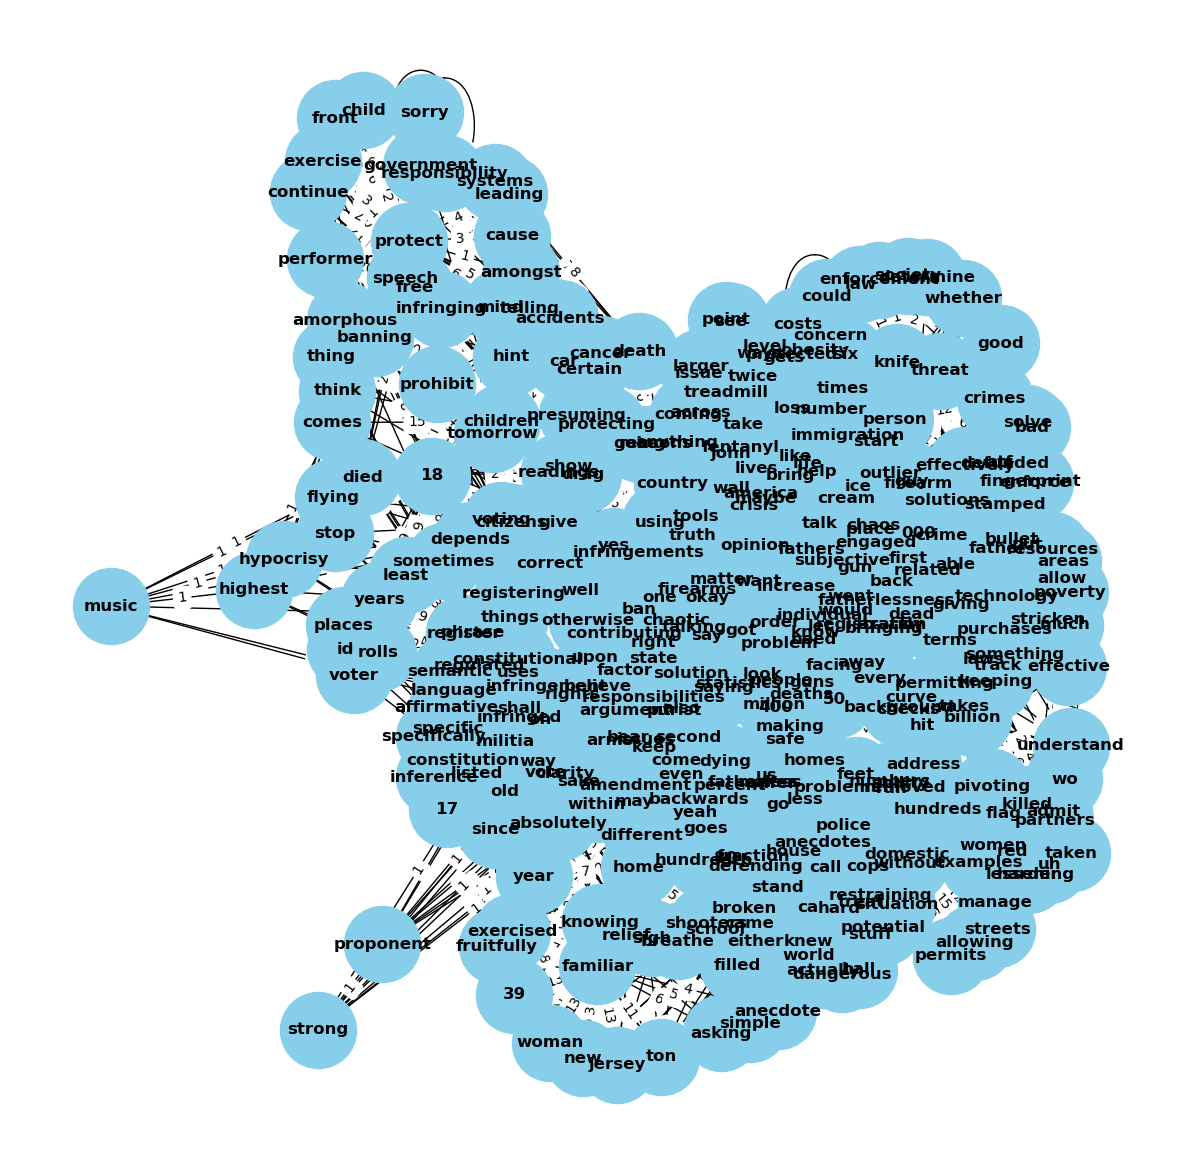

In [424]:
def visualize_network(G, threshold):
    # Remove edges with weights below the threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < threshold]
    G.remove_edges_from(edges_to_remove)
    # add ax
    fig, ax = plt.subplots(figsize=(15, 15))

    # Visualize the network
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=12, font_weight='bold', ax=ax)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Set a weight threshold to visualize significant co-occurrences
threshold = -1
visualize_network(G, threshold)

["I'm a strong proponent of the Second Amendment I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language it's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah I'm not against the Second Amendment I'm not again I don't want to ban guns but you're saying more guns makes us more safe yes so when we got 400 million guns in the country we had an increase and gun deaths went up so when exactly does this curve hit that takes it down would a billion guns do it let's just run those numbers you know 400 million 50 000. you're talking about a less than a fraction of not even a percent of a hundredth of a percent but it goes up not down so your argument is backwards but if you want okay so so let's let's come up with a solution okay so one of the issues a contributing factor again

In [116]:
transcripts

,transcript,text,language_code,is_generated
0,[{'text': 'I'm a strong proponent of the Secon...,I'm a strong proponent\nof the Second Amendmen...,en,False
1,[{'text': 'I'm a strong proponent of the Secon...,I'm a strong proponent of the Second Amendment...,en,True


In [10]:
transcript = list(transcripts[transcripts['is_generated']]['text'])[0]
transcript

NameError: name 'transcripts' is not defined

In [2]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 22.7 MB/s eta 0:00:0000:0100:01
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 MB/s eta 0:00:00a 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# PUNCTUATION

In [44]:
import torch
torch.backends.quantized.engine = 'qnnpack'
model, example_texts, languages, punct, apply_te = torch.hub.load(repo_or_dir='snakers4/silero-models', model='silero_te')


Using cache found in /Users/coultont/.cache/torch/hub/snakers4_silero-models_master


In [ ]:

#your text goes here. I imagine it is contained in some list

punkt_transcript = apply_te(transcript, lan='en')

In [148]:
punkt_transcript

"I'm, a strong proponent of the Second Amendment. I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language. It's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah, I'm not against the Second Amendment I'm not again. I don't want to ban guns, but you're saying more guns makes us more safe. Yes so when we got 400 million guns in the country, we had an increase and gun deaths went up. So when exactly does this curve hit that takes it down, would a billion guns do it let's just run those numbers. You know 400 million, 50 000. you're talking about a less than a fraction of not even. A percent of a hundredth of A percent, but it goes up not down. So your argument is backwards, but if you want okay so so let's let's come up with a solution okay, so one of the issues a contribut

In [111]:
with open('hasan_transcript.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['text'] = df['transcript'].apply(lambda x: ' '.join([i['text'] for i in x]))

In [112]:
def add_punctuation(text):
    """
    Adds punctuation to the end of a string.
    """
    torch.backends.quantized.engine = 'qnnpack'
    # texts = []
    # chunks_size = 100
    # while len(text.split()) > chunks_size:
    #     model, example_texts, languages, punct, apply_te = torch.hub.load(repo_or_dir='snakers4/silero-models',
    #                                                                   model='silero_te')
    #     print(len(text.split()[:chunks_size]))
    #     print(text[:chunks_size])
    #     texts.append(apply_te(" ".join(text.split()[:chunks_size])))
    #     text = " ".join(text.split()[chunks_size:])
    # model, example_texts, languages, punct, apply_te = torch.hub.load(repo_or_dir='snakers4/silero-models',
    #                                                                 model='silero_te')
    # texts.append(apply_te(text)) if len(text) > 0 else None
    # return ' '.join(texts)
    model, example_texts, languages, punct, apply_te = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                                                    model='silero_te')
    return apply_te(text, lan='en')

In [113]:
len(" ".join(df.text.values[0].split()))

16816

In [114]:
# get the index of every is_generated transcript
# print(w:=transcripts.loc[transcripts['is_generated'], 'text'].index)
import re

df.loc[df['is_generated'], 'text'] = df[df['is_generated']].apply(lambda row: add_punctuation(re.sub(r'[^a-zA-Z0-9\s]+', 'X', row['text'])), axis=1)

# transcripts.loc[transcripts.index.isin(w), 'text'].values[0]


Using cache found in /Users/coultont/.cache/torch/hub/snakers4_silero-models_master


In [123]:
pd.DataFrame((w:=[{'hell': 'hloe', 'death': 'door'}, {'hell': 'hey', 'death': 'low'}]), index=range(len(w)))

,hell,death
0,hloe,door
1,hey,low


In [115]:
len(df['text'].values[0])

17023

In [116]:
df['text'].values[0]

'Uh! We are now moving on to Missouri. A teenager was shot after going to the wrong house to pick up his brother and the person who shot him was. Uh was questioned by the police and then releasedNK] take a look went to the wrong home to pick up his younger brothers and the homeowner shot him.NK] Ralph Yarl is recovering in the hospital in stable condition. His family describes him as a typical high schooler who loves to play the bass clarinet. He has been looking forward to starting college and majoring in chemical engineering. Police sayNK] family say that he was given the address 115th Terrace, but he mistakenly went to a home at 115th Street. Instead. The shooter has been released and there is sparking protest Nation wide, right now and outraged Nationwide good morning DOn authorities say more is needed to go. needed to go forward, and they need a statement from Ralph Yarl. He is doing well.NK] in the hospital.NK] recovering, but the family says that it. This is a long road, especia

In [155]:
list(transcripts.loc[transcripts['is_generated']]['text'])[0]

"I'm, a strong proponent of the Second Amendment. I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language. It's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah, I'm not against the Second Amendment I'm not again. I don't want to ban guns, but you're saying more guns makes us more safe. Yes so when we got 400 million guns in the country, we had an increase and gun deaths went up. So when exactly does this curve hit that takes it down, would a billion guns do it let's just run those numbers. You know 400 million, 50 000. you're talking about a less than a fraction of not even. A percent of a hundredth of A percent, but it goes up not down. So your argument is backwards, but if you want okay so so let's let's come up with a solution okay, so one of the issues a contribut

In [ ]:
sentences = sent_tokenize(transcript)
print(sentences[0:5])
tokenized_sentences = [preprocess(sentence) for sentence in sentences]

In [452]:
len(tokenized_sentences)

88

In [453]:
def sentence_similarity(sent1, sent2):
    sent1_set = set(sent1)
    sent2_set = set(sent2)

    if len(sent1_set) == 0 or len(sent2_set) == 0:
        return 0

    return len(sent1_set.intersection(sent2_set)) / (len(sent1_set.union(sent2_set)))

In [454]:
import numpy as np

def similarity_matrix(sentences):
    n = len(sentences)
    matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            if i == j:
                matrix[i][j] = 1
            else:
                matrix[i][j] = sentence_similarity(sentences[i], sentences[j])
                matrix[j][i] = matrix[i][j]

    return matrix

sim_matrix = similarity_matrix(tokenized_sentences)

In [455]:
def compute_pagerank(sim_matrix):
    G = nx.from_numpy_array(sim_matrix)
    return nx.pagerank_numpy(G)

pagerank_scores = compute_pagerank(sim_matrix)

/var/folders/0v/dh9sl13n5_gdh3hpwjglnycw0000gn/T/ipykernel_94170/2449742264.py:3: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return nx.pagerank_numpy(G)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [456]:
def most_important_sentence(pagerank_scores, sentences):
    # max_score_index = max(pagerank_scores, key=pagerank_scores.get)
    max_score_indexes = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:5]
    return [sentences[max_score_index] for max_score_index in max_score_indexes]

important_sentence = most_important_sentence(pagerank_scores, sentences)
print("Most important sentence:", important_sentence)

Most important sentence: ['Yes okay is voting a right.', 'Right is that an infringement does the right to voting say shall not be infringed.', "Okay you may do here's here's what I'm saying you want to say.", 'You want to bring order, but guns are the outlier for you.', "No so you know what would help the problem that we're facing with Firearms right the fatherlessness crisis that we have in America."]


In [457]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [458]:
def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, preprocessor=lambda x: x)
X = vectorizer.fit_transform(tokenized_sentences)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


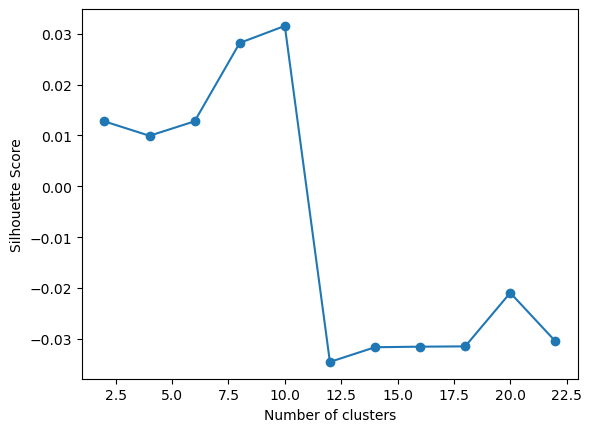

Optimal number of clusters: 10


In [459]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    s_scores = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        s_scores.append(silhouette_score(data, kmeans.labels_))

    optimal_k = iters[s_scores.index(max(s_scores))]
    plt.plot(iters, s_scores, '-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return optimal_k

max_k = int(len(sentences)/4)
optimal_k = find_optimal_clusters(X, max_k)
print("Optimal number of clusters:", optimal_k)

In [460]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [461]:
for i in range(optimal_k):
    print(f"Cluster {i+1}:")
    for j, label in enumerate(kmeans.labels_):
        if label == i:
            print(f"\t{sentences[j]}")

Cluster 1:
	For fatherless homes, No that's not what I would say.
	Now no it's not do you believe voting rights can be infringed because it doesn't say specifically is it shall not be inference?
	You want to ban drag show readings to children Tomorrow yes why why why?
	Why can we prohibit children from voting those under 18 from voting?
	The leading cause of death amongst children in this country and I'm going to give you a hint.
	It's not drag show readings to Children correct yes, so what is it I'm presuming you're going to say it's Firearms no.
	It's Firearms more than cancer, more than car accidents, and what you're telling me is you don't mind infringing free speech to protect children from this amorphous thing that you think of, But when it comes to children that have died, you don't give a flying [ — — ] to stop that because that shall not be infringed that is hypocrisy at its highest orderNK].
Cluster 2:
	So when exactly does this curve hit that takes it down, would a billion g

In [462]:
def sentences_in_clusters(kmeans, sentences):
    clusters = {}
    for i, label in enumerate(kmeans.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentences[i])
    return clusters

clusters = sentences_in_clusters(kmeans, sentences)

In [463]:
cluster_pagerank = {}
for cluster_id, cluster_sentences in clusters.items():
    cluster_tokenized_sentences = [preprocess(sentence) for sentence in cluster_sentences]
    cluster_sim_matrix = similarity_matrix(cluster_tokenized_sentences)
    cluster_pagerank[cluster_id] = compute_pagerank(cluster_sim_matrix)

/var/folders/0v/dh9sl13n5_gdh3hpwjglnycw0000gn/T/ipykernel_94170/2449742264.py:3: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return nx.pagerank_numpy(G)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [464]:
for cluster_id, pagerank_scores in cluster_pagerank.items():
    print(f"Cluster {cluster_id+1}:")
    for i, score in enumerate(pagerank_scores.values()):
        print(f"\tSentence: {clusters[cluster_id][i]}")
        print(f"\tPageRank: {score}\n")

Cluster 5:
	Sentence: I'm, a strong proponent of the Second Amendment.
	PageRank: 0.26953780744999184

	Sentence: It's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah, I'm not against the Second Amendment I'm not again.
	PageRank: 0.23037534261597425

	Sentence: guns, why don't they breathe a sigh of relief, Knowing that this second amendment that shall not be infringed is being exercised so fruitfully In this home are you familiar with the 39-year-old woman in New Jersey I'm, familiar with a ton of anecdotes Yeah I'm asking you a simple.
	PageRank: 0.22749085226938548

	Sentence: I'm a second amendment.
	PageRank: 0.2725959976646485

Cluster 6:
	Sentence: I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language.
	PageRank: 0.05823652551866293

	Sentence: You know 400 

In [465]:
def cluster_representative(cluster_sentences):
    cluster_tokenized_sentences = [preprocess(sentence) for sentence in cluster_sentences]
    cluster_sim_matrix = similarity_matrix(cluster_tokenized_sentences)
    cluster_pagerank = compute_pagerank(cluster_sim_matrix)

    max_score_index = max(cluster_pagerank, key=cluster_pagerank.get)
    return cluster_sentences[max_score_index]

In [466]:
representative_sentences = [cluster_representative(cluster) for cluster in clusters.values()]

/var/folders/0v/dh9sl13n5_gdh3hpwjglnycw0000gn/T/ipykernel_94170/2449742264.py:3: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return nx.pagerank_numpy(G)


In [467]:
tokenized_representatives = [preprocess(sentence) for sentence in representative_sentences]
representative_sim_matrix = similarity_matrix(tokenized_representatives)
representative_pagerank = compute_pagerank(representative_sim_matrix)

/var/folders/0v/dh9sl13n5_gdh3hpwjglnycw0000gn/T/ipykernel_94170/2449742264.py:3: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return nx.pagerank_numpy(G)


In [481]:
for i, (cluster_id, score) in enumerate(representative_pagerank.items()):
    print(f"Cluster {i+1} (ID {cluster_id}):")
    print(f"\tRepresentative Sentence: {representative_sentences[cluster_id]}")
    print(f"\tPageRank: {score}\n")

Cluster 1 (ID 0):
	Representative Sentence: I'm a second amendment.
	PageRank: 0.10000000000000002

Cluster 2 (ID 1):
	Representative Sentence: No so you know what would help the problem that we're facing with Firearms right the fatherlessness crisis that we have in America.
	PageRank: 0.10056847621122789

Cluster 3 (ID 2):
	Representative Sentence: If they knew that there were firearms in the house that's a safer call is that what you're saying no because police because why because police treat every situation as a potential, but more guns makes us safer so why don't when the police go to a house filled with.
	PageRank: 0.1000128336238851

Cluster 4 (ID 3):
	Representative Sentence: Yes.
	PageRank: 0.09828391089500456

Cluster 5 (ID 4):
	Representative Sentence: So your argument is backwards, but if you want okay so so let's let's come up with a solution okay, so one of the issues a contributing factor.
	PageRank: 0.09897430315074555

Cluster 6 (ID 5):
	Representative Sentence: Law en

In [469]:
! pip install gensim

In [470]:
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [471]:
# Tokenize the sentences
sentences = sent_tokenize(transcript)
tokenized_sentences = [preprocess(sentence) for sentence in sentences]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in tokenized_sentences]

In [472]:
num_topics = 5  # Choose the number of topics you want to discover
passes = 20  # Choose the number of passes for better convergence

lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=42)

In [473]:
def display_topics(model, num_topics, num_words=2):
    for topic_idx, topic in model.print_topics(num_topics=num_topics, num_words=num_words):
        print(f"Topic {topic_idx + 1}:")
        print(f"{topic}\n")

display_topics(lda_model, num_topics)

Topic 1:
0.043*"yes" + 0.036*"guns"

Topic 2:
0.029*"right" + 0.017*"guns"

Topic 3:
0.031*"right" + 0.025*"voting"

Topic 4:
0.025*"want" + 0.020*"second"

Topic 5:
0.027*"would" + 0.027*"gun"



In [248]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/coultont/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/coultont/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/coultont/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/coultont/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/coultont/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/coultont/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [182]:
!pip install -U spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 26.7 MB/s eta 0:00:0000:0100:01
  Using cached murmurhash-1.0.9-cp310-cp310-macosx_11_0_arm64.whl (19 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.1 MB/s eta 0:00:0000:0100:01
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.0/776.0 kB 19.0 MB/s eta 0:00:0000:01
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 kB 14.8 MB/s eta 0:00:00
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached cymem-2.0.7-cp310-cp310-macosx_11_0_arm64.whl (30 kB)
  Using cached preshed-3.0.8-cp310-cp310-macosx_11_0_arm64.whl (101 kB)
  Using cached confection-0.0.4-py3-none-any.

In [373]:
import nltk
import spacy
from textblob import TextBlob

In [187]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [374]:
nlp = spacy.load("en_core_web_sm")

In [474]:
def extract_named_entities(sentences):
    entities_sentences = {}
    for sentence in sentences:
        doc = nlp(sentence)
        for ent in doc.ents:
            if ent.label_ not in entities_sentences:
                entities_sentences[ent.label_] = []
            entities_sentences[ent.label_].append((ent.text, sentence)) if ent.label_ not in ['DATE', 'CARDINAL', 'TIME', 'PERCENT', 'ORDINAL', 'MONEY', 'QUANTITY'] else None
    return entities_sentences

named_entities_sentences = extract_named_entities(sentences)

In [475]:
named_entities_sentences



{'LAW': [('the Second Amendment',
   "I'm, a strong proponent of the Second Amendment."),
  ('Constitution',
   "I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language."),
  ('the Second Amendment',
   "It's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah, I'm not against the Second Amendment I'm not again.")],
 'CARDINAL': [],
 'ORDINAL': [],
 'ORG': [('Treadmill',
   'Treadmill crisis is twice what the gun death crisis is okay so until the gun crisis gets to the fentanyl level not until.'),
  ('Society',
   'Law enforcement or Society determine whether or not a person is a good guy with a gun or a bad guy with a gun would allow you to have much more effective background checks.'),
  ('Citizens', "It's a right for Citizens.")],
 'GPE': [('America',
   "You don't wan

In [476]:
def sentiment_analysis(entity_sentences):
    sentiment_scores = []
    for entity, sentence in entity_sentences:
        sentiment = TextBlob(sentence).sentiment
        sentiment_scores.append((entity, sentence, sentiment.polarity, sentiment.subjectivity))
    return sentiment_scores

In [477]:
for entity_label, entity_sentences in named_entities_sentences.items():
    print(f"Entity Type: {entity_label}")
    sentiment_scores = sentiment_analysis(entity_sentences)
    for entity, sentence, polarity, subjectivity in sentiment_scores:
        print(f"\tEntity: {entity}")
        print(f"\tSentence: {sentence}")
        print(f"\tPolarity: {polarity} (negative: -1, positive: 1)")
        print(f"\tSubjectivity: {subjectivity} (objective: 0, subjective: 1)\n")

Entity Type: LAW
	Entity: the Second Amendment
	Sentence: I'm, a strong proponent of the Second Amendment.
	Polarity: 0.21666666666666665 (negative: -1, positive: 1)
	Subjectivity: 0.36666666666666664 (objective: 0, subjective: 1)

	Entity: Constitution
	Sentence: I believe the right to keep in bear arms shall not be infringed that's the one right that's listed in the Constitution that uses that very specific affirmative language.
	Polarity: 0.2928571428571428 (negative: -1, positive: 1)
	Subjectivity: 0.5334821428571429 (objective: 0, subjective: 1)

	Entity: the Second Amendment
	Sentence: It's also the one right that uses the the phrase well regulated correct when it's talking about the militia and the state by the way just for clarity's sake yeah, I'm not against the Second Amendment I'm not again.
	Polarity: 0.14285714285714285 (negative: -1, positive: 1)
	Subjectivity: 0.26785714285714285 (objective: 0, subjective: 1)

Entity Type: CARDINAL
Entity Type: ORDINAL
Entity Type: ORG
	

In [478]:
def sentiment_analysis(entity_sentences):
    sentiment_scores = {}
    for entity, sentence in entity_sentences:
        sentiment = TextBlob(sentence).sentiment
        sentiment_scores[entity] = (sentiment.polarity, sentiment.subjectivity)
    return sentiment_scores

In [479]:
all_entity_sentiments = {}
for entity_label, entity_sentences in named_entities_sentences.items():
    all_entity_sentiments.update(sentiment_analysis(entity_sentences))

In [480]:
top_entities = sorted(all_entity_sentiments.items(), key=lambda x: abs(x[1][0]), reverse=True)[:10]

for entity, sentiment_scores in top_entities:
    print(f"Entity: {entity}")
    print(f"\tPolarity: {sentiment_scores[0]} (negative: -1, positive: 1)")
    print(f"\tSubjectivity: {sentiment_scores[1]} (objective: 0, subjective: 1)\n")

Entity: Treadmill
	Polarity: 0.5 (negative: -1, positive: 1)
	Subjectivity: 0.5 (objective: 0, subjective: 1)

Entity: Constitution
	Polarity: 0.2928571428571428 (negative: -1, positive: 1)
	Subjectivity: 0.5334821428571429 (objective: 0, subjective: 1)

Entity: Citizens
	Polarity: 0.2857142857142857 (negative: -1, positive: 1)
	Subjectivity: 0.5357142857142857 (objective: 0, subjective: 1)

Entity: America
	Polarity: 0.2857142857142857 (negative: -1, positive: 1)
	Subjectivity: 0.5357142857142857 (objective: 0, subjective: 1)

Entity: Society
	Polarity: 0.275 (negative: -1, positive: 1)
	Subjectivity: 0.6416666666666666 (objective: 0, subjective: 1)

Entity: Knowing
	Polarity: 0.17727272727272728 (negative: -1, positive: 1)
	Subjectivity: 0.36233766233766235 (objective: 0, subjective: 1)

Entity: New Jersey
	Polarity: 0.17727272727272728 (negative: -1, positive: 1)
	Subjectivity: 0.36233766233766235 (objective: 0, subjective: 1)

Entity: the Second Amendment
	Polarity: 0.1428571428571